In [2]:
import numpy as np

with open('seven_plastics/1_polyethylene_PET/85943598-ec9b-4da5-9221-8c32b5742e72.jpg', 'rb') as path:
    image = np.frombuffer(path.read(), dtype=np.uint8,
                               offset=16)


img_matrix = np.asarray(image)

img_matrix.shape


(28915,)

In [3]:
import os
from PIL import Image
import random

data = []
train_dataset_x = np.array([])
test_dataset_x = np.array([])

train_dataset_y = np.array([])
test_dataset_y = np.array([])
source_dir = 'seven_plastics'


for nums in  os.listdir(source_dir):
    actual_num  = nums.split('_')[0]
    
    data = os.listdir(source_dir + '/' + nums)

    random.shuffle(data)
    
    
   
    for img in data[:int(len(data) * 0.9)]:
        img_tmp = Image.open(source_dir + '/' + nums + '/' + img).resize((200,200))
        img_matrix = np.array(img_tmp)
        
        train_dataset_y = np.append(train_dataset_y, actual_num)
        train_dataset_x = np.append(train_dataset_x ,img_matrix)
    
    for img in data[-int(len(data) * 0.1):]:
        img_tmp = Image.open(source_dir + '/' + nums + '/' + img).resize((200,200))
        img_matrix = np.array(img_tmp)
        test_dataset_y = np.append(test_dataset_y, actual_num)
        test_dataset_x = np.append(test_dataset_x ,img_matrix)



In [4]:
train_dataset_x = train_dataset_x.reshape((train_dataset_y.shape[0], 200, 200, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[130 130 130]
  [130 130 130]
  [129 129 129]
  ...
  [ 78  79  74]
  [ 76  77  72]
  [ 74  75  70]]

 [[130 130 130]
  [130 130 130]
  [129 129 129]
  ...
  [ 77  78  73]
  [ 76  77  72]
  [ 75  76  71]]

 [[130 130 130]
  [129 129 129]
  [129 129 129]
  ...
  [ 75  76  71]
  [ 76  77  72]
  [ 76  77  72]]

 ...

 [[140 144 143]
  [139 143 142]
  [138 142 141]
  ...
  [ 93  94  89]
  [ 92  93  88]
  [ 91  92  87]]

 [[140 144 143]
  [139 143 142]
  [137 141 140]
  ...
  [ 91  92  87]
  [ 90  91  86]
  [ 90  91  86]]

 [[140 144 143]
  [138 142 141]
  [136 140 139]
  ...
  [ 90  91  86]
  [ 89  90  85]
  [ 89  90  85]]]
4


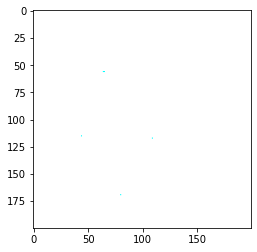

In [69]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
img = Image.open('seven_plastics/1_polyethylene_PET/85943598-ec9b-4da5-9221-8c32b5742e72.jpg')
numpydata = np.asarray(img)
 
# data
print(numpydata)


def visualize_mnist(X, y):
    label_idx = [y == i for i in range(10)]
    print(y)
    
    #ims = np.array([X[label_idx[i]][:10] for i in range(10)])

    classes = ['T-shirt/top']
    
    	
    fig, ax = plt.subplots()
    img = ax.imshow(X)
    	

    plt.show()

visualize_mnist(train_dataset_x[20], train_dataset_y[20])

In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_circles, make_moons, make_blobs
from matplotlib import pyplot as plt
import numpy as np
import gzip
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Activation, Flatten, MaxPooling2D
from keras import backend as K




In [8]:
input_shape = (200, 200, 3)


cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(keras.layers.Dropout(0.2))
cnn.add(Dense(200, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001),  metrics=['accuracy'])

history = cnn.fit(train_dataset_x, tf.keras.utils.to_categorical(train_dataset_y), epochs=2, batch_size=512, 
                  validation_split=0.1, verbose=True)



Epoch 1/2


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/damiangorcak/miniconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/damiangorcak/miniconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/damiangorcak/miniconda3/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/damiangorcak/miniconda3/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/damiangorcak/miniconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/nw/yqw0rcy552v_47m8ghvzmccm0000gn/T/ipykernel_7286/512299558.py", line 20, in <module>
      history = cnn.fit(train_dataset_x, tf.keras.utils.to_categorical(train_dataset_y), epochs=2, batch_size=512,
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/damiangorcak/miniconda3/lib/python3.9/site-packages/keras/backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [512,10] and labels shape [4608]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1709]